In [1]:
# IMPORTING BASIC LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

In [2]:
# LOADING THE CEMENTSALES DATA
df = pd.read_excel("DataFinal.xlsx")

In [3]:
df.head(10)

,Product,Date,Day,FY,Orders_Placed(Qty),NetSales(Qty),Net_SalesPerYear(Cr)
0,Ambuja Cement,2019-04-01,Monday,19 Q2,61,59,26799.0
1,Ambuja Cement,2019-04-02,Tuesday,19 Q2,78,67,NaN
2,Ambuja Cement,2019-04-03,Wednesday,19 Q2,80,67,NaN
3,Ambuja Cement,2019-04-04,Thursday,19 Q2,69,58,NaN
4,Ambuja Cement,2019-04-05,Friday,19 Q2,68,60,NaN
5,Ambuja Cement,2019-04-06,Saturday,19 Q2,73,59,NaN
6,Ambuja Cement,2019-04-08,Monday,19 Q2,77,70,NaN
7,Ambuja Cement,2019-04-09,Tuesday,19 Q2,69,58,NaN
8,Ambuja Cement,2019-04-10,Wednesday,19 Q2,70,61,NaN
9,Ambuja Cement,2019-04-11,Thursday,19 Q2,77,67,NaN


In [4]:
df.tail(5)

,Product,Date,Day,FY,Orders_Placed(Qty),NetSales(Qty),Net_SalesPerYear(Cr)
1144,Ambuja Cement,2022-11-25,Friday,22 Q4,139,124,NaN
1145,Ambuja Cement,2022-11-26,Saturday,22 Q4,125,125,NaN
1146,Ambuja Cement,2022-11-28,Monday,22 Q4,145,134,NaN
1147,Ambuja Cement,2022-11-29,Tuesday,22 Q4,123,115,NaN
1148,Ambuja Cement,2022-11-30,Wednesday,22 Q4,127,114,NaN


In [5]:
# lets Check for Missing Values
df.isna().sum()


Product                    0
Date                       0
Day                        0
FY                         0
Orders_Placed(Qty)         0
NetSales(Qty)              0
Net_SalesPerYear(Cr)    1145
dtype: int64

In [6]:
df.describe()

,Orders_Placed(Qty),NetSales(Qty),Net_SalesPerYear(Cr)
count,1149.000000,1149.000000,4.00000
mean,85.678851,78.127937,25612.25000
std,21.370966,20.554173,2618.02564
min,40.000000,39.000000,23447.00000
25%,70.000000,63.000000,23454.50000
50%,85.000000,76.000000,25128.00000
75%,101.000000,93.000000,27285.75000
max,148.000000,134.000000,28746.00000


(array([ 85., 145., 110., 250., 158., 161., 140.,  50.,  24.,  26.]),
 array([ 39. ,  48.5,  58. ,  67.5,  77. ,  86.5,  96. , 105.5, 115. ,
        124.5, 134. ]),
 <BarContainer object of 10 artists>)

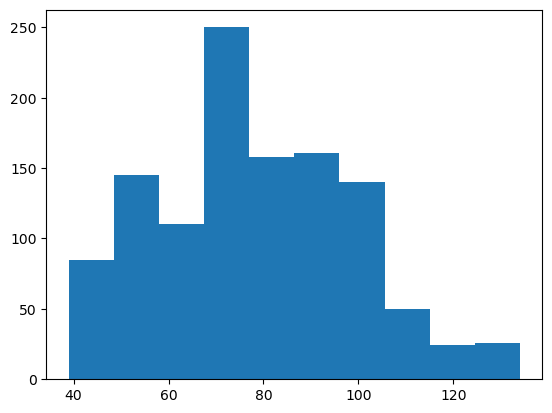

In [7]:
#Univariate Analysis
#Histogram for Sales data
plt.hist(df['NetSales(Qty)'])

(array([ 47., 129., 129., 237., 204., 164., 147.,  53.,  24.,  15.]),
 array([ 40. ,  50.8,  61.6,  72.4,  83.2,  94. , 104.8, 115.6, 126.4,
        137.2, 148. ]),
 <BarContainer object of 10 artists>)

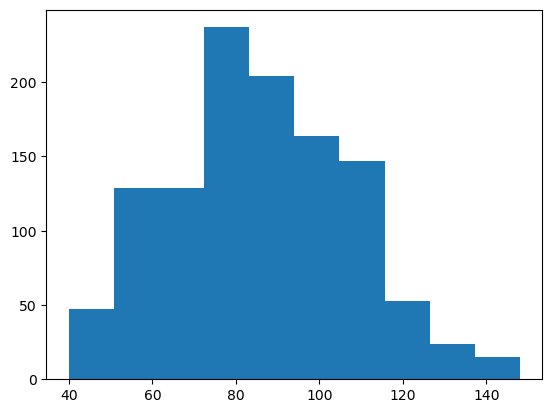

In [8]:
# Histogram For Demands Data
plt.hist(df["Orders_Placed(Qty)"])
# Normally Distribiuted Data

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NetSales(Qty)', ylabel='Density'>

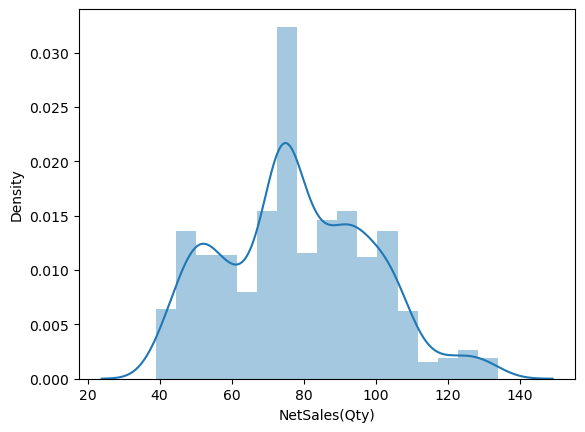

In [9]:
# Distribution plot For Sales Data
sns.distplot(df["NetSales(Qty)"])
#Positive Skewed Distribiuted Data with low kurtosis

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Orders_Placed(Qty)', ylabel='Density'>

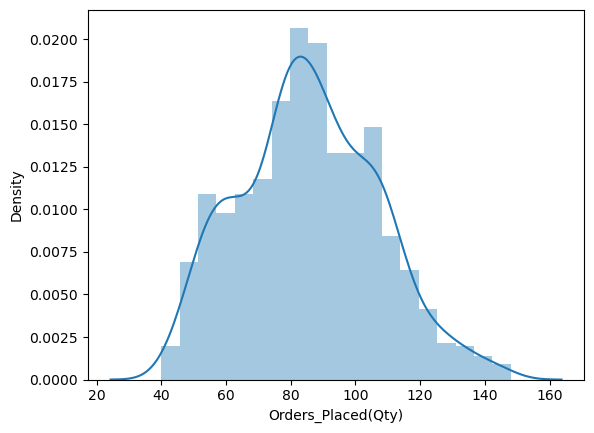

In [10]:
# Distribution plot For Demands Data
sns.distplot(df["Orders_Placed(Qty)"])
# Positive Skewed Distribiuted Data with high kurtosis

{'whiskers': [<matplotlib.lines.Line2D at 0x25aa4144820>,
 'caps': [<matplotlib.lines.Line2D at 0x25aa4144dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25aa41445e0>],
 'medians': [<matplotlib.lines.Line2D at 0x25aa41523a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25aa4152670>],
 'means': []}

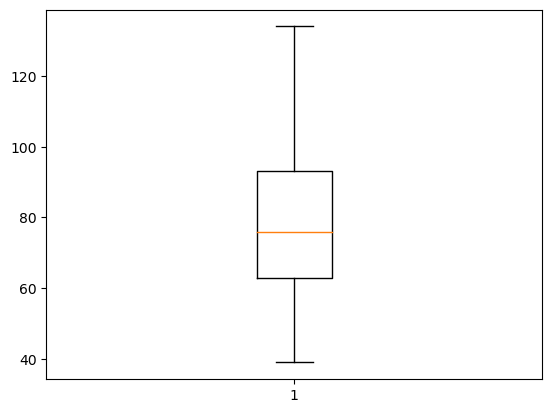

In [11]:
# Boxplot on Sales data

plt.boxplot(df['NetSales(Qty)'])   

{'whiskers': [<matplotlib.lines.Line2D at 0x25aa41ae4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x25aa41aea00>,
 'boxes': [<matplotlib.lines.Line2D at 0x25aa41ae220>],
 'medians': [<matplotlib.lines.Line2D at 0x25aa41aefa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25aa41b82b0>],
 'means': []}

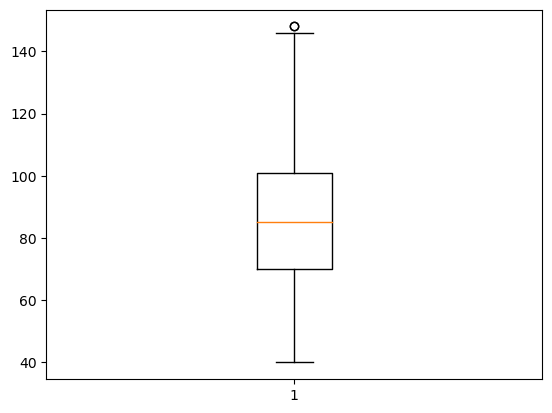

In [12]:
# Boxplot on demands data

plt.boxplot(df['Orders_Placed(Qty)'])

In [13]:
# Outlier treatment With Winsorization
from feature_engine.outliers import Winsorizer

winsor = Winsorizer(capping_method ='iqr',
                   fold =1.5,
                   tail='both',
                   variables=['Orders_Placed(Qty)', 'NetSales(Qty)'])

In [14]:
df = winsor.fit_transform(df)

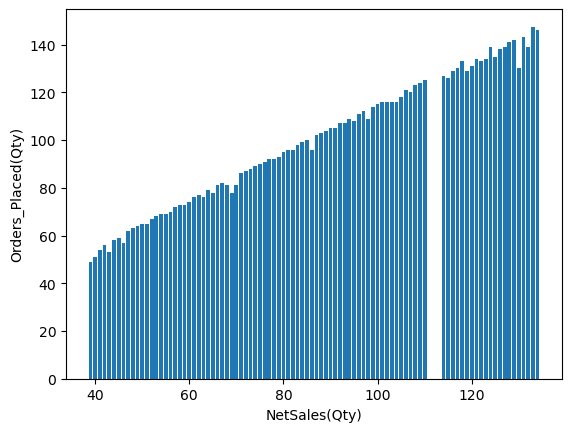

In [15]:
# Bivariate Analysis 
#BARplot
plt.bar(x=df["NetSales(Qty)"], height=df["Orders_Placed(Qty)"]),
plt.xlabel("NetSales(Qty)"),
plt.ylabel("Orders_Placed(Qty)")
plt.show()

Text(0, 0.5, 'Orders_Placed(Qty)')

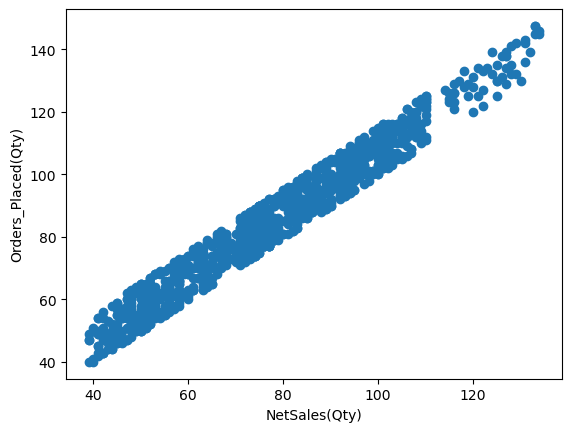

In [16]:
# Scatter plot
plt.scatter(df["NetSales(Qty)"], df["Orders_Placed(Qty)"])
plt.xlabel("NetSales(Qty)"),
plt.ylabel("Orders_Placed(Qty)")
# Data is Linear in Nature

In [17]:
df = df.set_index("Date")

In [25]:
Dfs = df.iloc[:,4]
Dfs

Date
2019-04-01     59.0
2019-04-02     67.0
2019-04-03     67.0
2019-04-04     58.0
2019-04-05     60.0
              ...  
2022-11-25    124.0
2022-11-26    125.0
2022-11-28    134.0
2022-11-29    115.0
2022-11-30    114.0
Name: NetSales(Qty), Length: 1149, dtype: float64

In [26]:
#For Demands data
Dfd = df.iloc[:,3]
Dfd

Date
2019-04-01     61.0
2019-04-02     78.0
2019-04-03     80.0
2019-04-04     69.0
2019-04-05     68.0
              ...  
2022-11-25    139.0
2022-11-26    125.0
2022-11-28    145.0
2022-11-29    123.0
2022-11-30    127.0
Name: Orders_Placed(Qty), Length: 1149, dtype: float64

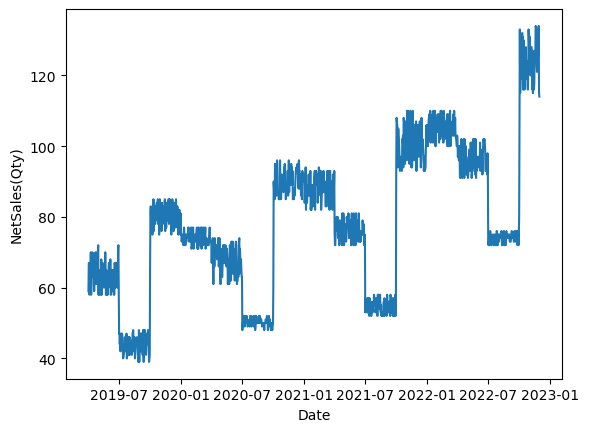

In [27]:
# Visualization of Sales Data
plt.plot(Dfs)
plt.xlabel("Date")
plt.ylabel("NetSales(Qty)"),
plt.show()

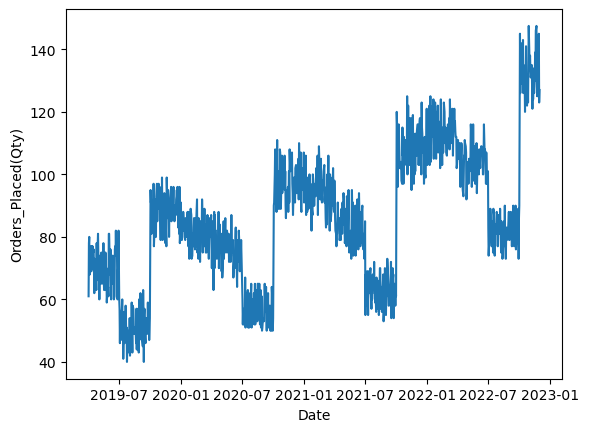

In [28]:
# Visualization of Demands Data
plt.plot(Dfd)
plt.xlabel("Date")
plt.ylabel("Orders_Placed(Qty)")
plt.show()

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [30]:
# Decomposing Sales Data / TimeSeries data into Components level,trend ,sesonal,noise
decompose_ts_add = seasonal_decompose(Dfs, model = "", period = 3)
print(decompose_ts_add.trend)
print(decompose_ts_add.seasonal)
print(decompose_ts_add.resid)
print(decompose_ts_add.observed)


Date
2019-04-01           NaN
2019-04-02     64.333333
2019-04-03     64.000000
2019-04-04     61.666667
2019-04-05     59.000000
                 ...    
2022-11-25    126.000000
2022-11-26    127.666667
2022-11-28    124.666667
2022-11-29    121.000000
2022-11-30           NaN
Name: trend, Length: 1149, dtype: float64
Date
2019-04-01   -0.102128
2019-04-02   -0.041816
2019-04-03    0.143945
2019-04-04   -0.102128
2019-04-05   -0.041816
                ...   
2022-11-25   -0.041816
2022-11-26    0.143945
2022-11-28   -0.102128
2022-11-29   -0.041816
2022-11-30    0.143945
Name: seasonal, Length: 1149, dtype: float64
Date
2019-04-01         NaN
2019-04-02    2.708483
2019-04-03    2.856055
2019-04-04   -3.564538
2019-04-05    1.041816
                ...   
2022-11-25   -1.958184
2022-11-26   -2.810612
2022-11-28    9.435462
2022-11-29   -5.958184
2022-11-30         NaN
Name: resid, Length: 1149, dtype: float64
Date
2019-04-01     59.0
2019-04-02     67.0
2019-04-03     67.0
2019-04-04

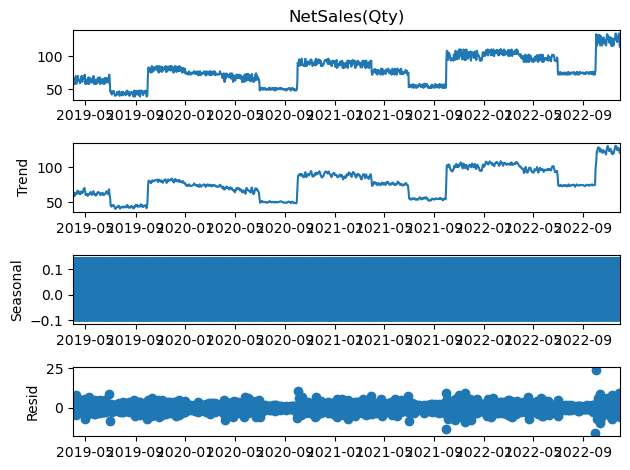

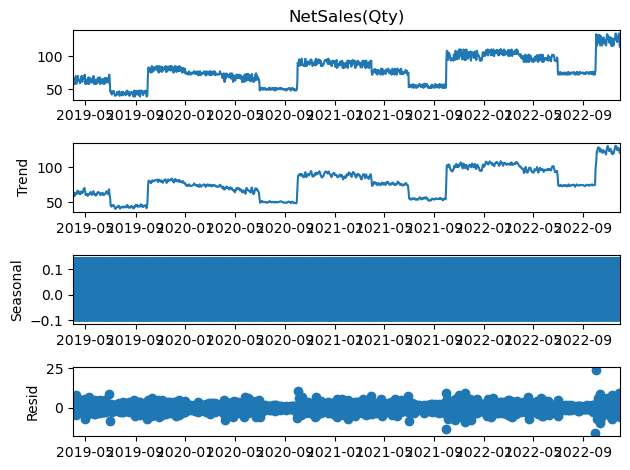

In [31]:
decompose_ts_add.plot()

In [32]:
from statsmodels.tsa.stattools import adfuller

In [33]:
#perform augmented Dickey-Fuller test
adfuller(Dfs)

(-2.0561224748908336,
 0.2625198333192495,
 9,
 1139,
 {'1%': -3.4361042569951805,
  '5%': -2.8640808675675826,
  '10%': -2.568122823703617},
 6807.078975639024)

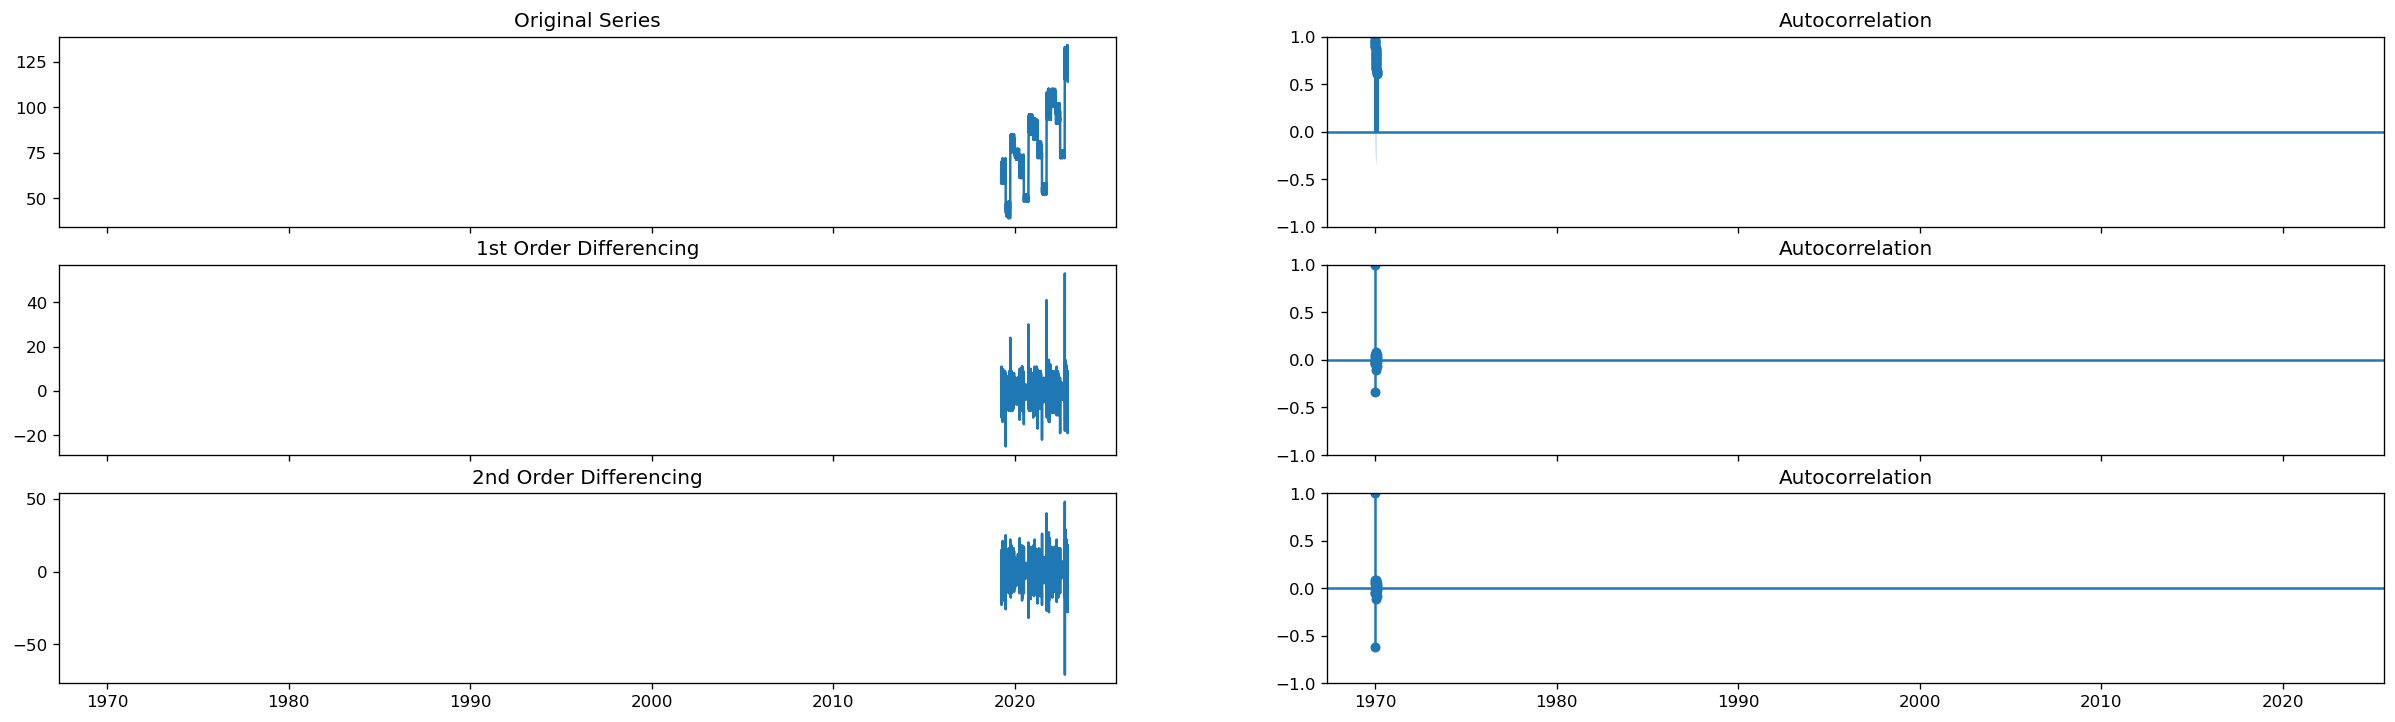

In [34]:
##### ACF Plots Visualization For Sales Data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(25,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(Dfs); axes[0, 0].set_title('Original Series')
plot_acf(Dfs, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(Dfs.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(Dfs.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(Dfs.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(Dfs.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


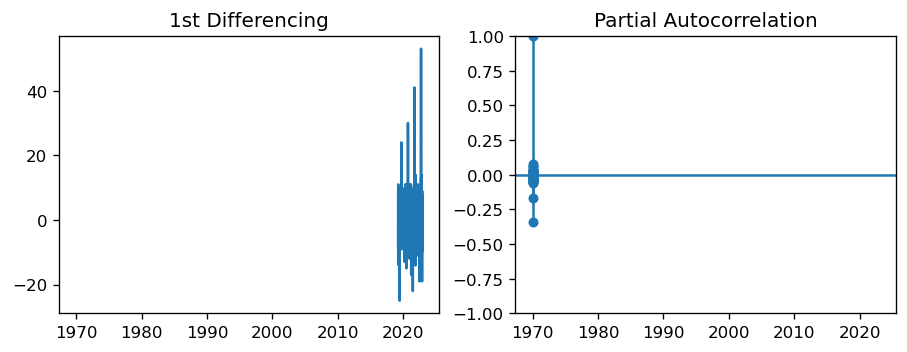

In [35]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(Dfs.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(Dfs.diff().dropna(), ax=axes[1])

plt.show()

In [36]:
### Splitting data into training And testing dataset
train_size = int(len(Dfs)*0.7)
test_size = len(Dfs)-train_size
(train_size, test_size)

(804, 345)

In [48]:
from statsmodels.tsa.stattools import acf

# Create Training and Test Data
train = Dfs[:804]
test = Dfs[804:]

In [49]:
# Build Model

from statsmodels.tsa.arima.model import ARIMA

# model = ARIMA(train, order=(1,1,1))  
model_A= ARIMA(train, order=(1, 1, 1))  
fitted = model_A.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:          NetSales(Qty)   No. Observations:                  804
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2379.682
Date:                Sat, 18 Feb 2023   AIC                           4765.363
Time:                        17:08:49   BIC                           4779.428
Sample:                             0   HQIC                          4770.765
                                - 804                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1146      0.070      1.627      0.104      -0.023       0.253
ma.L1         -0.4762      0.066     -7.252      0.000      -0.605      -0.348
sigma2        21.9528      0.432     50.796      0.0

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [50]:
# forecasts against actual outcomes
start_index = len(train)
end_index = start_index + 58
forecast_test = fitted.predict(start=start_index, end=end_index)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [51]:
print(forecast_test)

804    104.211381
805    103.777281
806    103.727541
807    103.721842
808    103.721189
809    103.721115
810    103.721106
811    103.721105
812    103.721105
813    103.721105
814    103.721105
815    103.721105
816    103.721105
817    103.721105
818    103.721105
819    103.721105
820    103.721105
821    103.721105
822    103.721105
823    103.721105
824    103.721105
825    103.721105
826    103.721105
827    103.721105
828    103.721105
829    103.721105
830    103.721105
831    103.721105
832    103.721105
833    103.721105
834    103.721105
835    103.721105
836    103.721105
837    103.721105
838    103.721105
839    103.721105
840    103.721105
841    103.721105
842    103.721105
843    103.721105
844    103.721105
845    103.721105
846    103.721105
847    103.721105
848    103.721105
849    103.721105
850    103.721105
851    103.721105
852    103.721105
853    103.721105
854    103.721105
855    103.721105
856    103.721105
857    103.721105
858    103.721105
859    103

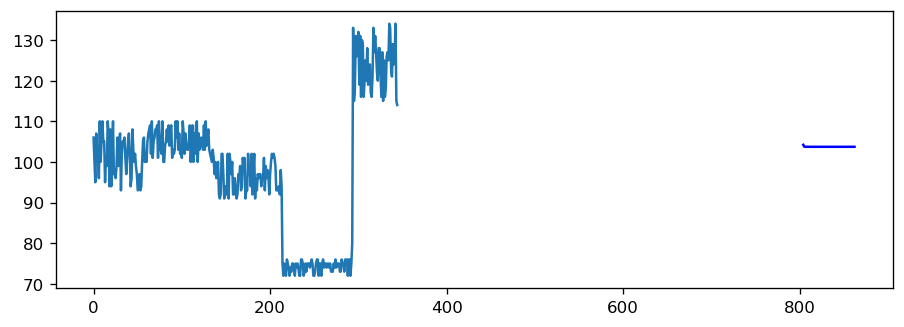

In [52]:
# plot forecasts against actual outcomes
pyplot.plot((test.reset_index('Date'))['NetSales(Qty)'])
pyplot.plot(forecast_test, color='blue')
pyplot.show()

In [59]:
# Forecast for Future 25 weeks 
start_index = len(df)
end_index = start_index + 24
forecast = fitted.predict(start=start_index, end=end_index)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [54]:
print(forecast)

1149    103.721105
1150    103.721105
1151    103.721105
1152    103.721105
1153    103.721105
1154    103.721105
1155    103.721105
1156    103.721105
1157    103.721105
1158    103.721105
1159    103.721105
1160    103.721105
1161    103.721105
1162    103.721105
1163    103.721105
1164    103.721105
1165    103.721105
1166    103.721105
1167    103.721105
1168    103.721105
1169    103.721105
1170    103.721105
1171    103.721105
1172    103.721105
1173    103.721105
Name: predicted_mean, dtype: float64


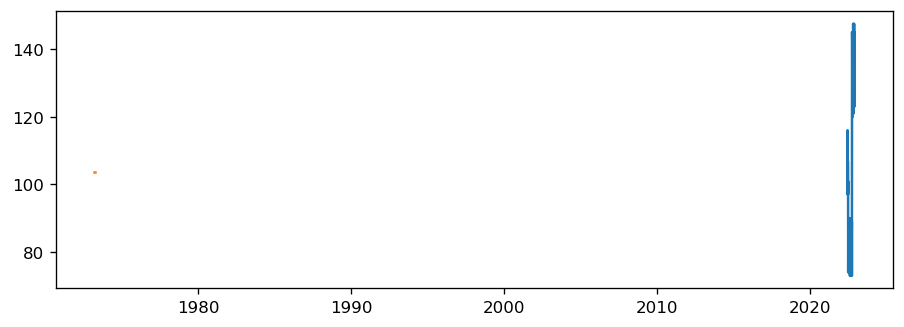

In [62]:
# plot  Future 90days forecasts
A = df['Orders_Placed(Qty)']
pyplot.plot(A[1000:])
pyplot.plot(forecast)
pyplot.show()

In [56]:
 # Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

In [57]:
forecast_accuracy(forecast, test.values[:25])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21272\4047540039.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21272\4047540039.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],


{'mape': 0.04746826799185909,
 'me': 1.401104867206094,
 'mae': 4.7665325840647315,
 'mpe': 0.01648670880248118,
 'rmse': 5.52998145104562,
 'acf1': nan,
 'corr': 1.2751017221267144e-15,
 'minmax': 0.045222614109792}

In [58]:
# pickling the model
import pickle
pickle_out = open("ARIMA1.pkl", "wb")
pickle.dump(model_A, pickle_out)
pickle_out.close()